In [130]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-product-data/Sales_August_2019.csv
/kaggle/input/sales-product-data/Sales_May_2019.csv
/kaggle/input/sales-product-data/Sales_February_2019.csv
/kaggle/input/sales-product-data/Sales_November_2019.csv
/kaggle/input/sales-product-data/Sales_January_2019.csv
/kaggle/input/sales-product-data/Sales_March_2019.csv
/kaggle/input/sales-product-data/Sales_September_2019.csv
/kaggle/input/sales-product-data/Sales_April_2019.csv
/kaggle/input/sales-product-data/Sales_July_2019.csv
/kaggle/input/sales-product-data/Sales_October_2019.csv
/kaggle/input/sales-product-data/Sales_June_2019.csv
/kaggle/input/sales-product-data/Sales_December_2019.csv


# Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

In [132]:
for i in os.listdir('/kaggle/input/sales-product-data'):
    print(i)

Sales_August_2019.csv
Sales_May_2019.csv
Sales_February_2019.csv
Sales_November_2019.csv
Sales_January_2019.csv
Sales_March_2019.csv
Sales_September_2019.csv
Sales_April_2019.csv
Sales_July_2019.csv
Sales_October_2019.csv
Sales_June_2019.csv
Sales_December_2019.csv


# Exploring Data

In [3]:
#list of files paths 
files = glob.glob("/kaggle/input/sales-product-data/Sales*.csv")
#joinig files with concat
sales_data = pd.concat(map(pd.read_csv, files), ignore_index = True)
#checking the first 5 rows
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [4]:
#checking the last 5 rows
sales_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"
186849,319670,Bose SoundSport Headphones,1,99.99,12/21/19 21:45,"747 Chestnut St, Los Angeles, CA 90001"


In [5]:
#getting info about the data
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


We have **186850** entries and **186305** non_null values so we have **545** null values


# Transforming Data

In [6]:
# drop the row when ALL values are NULL
sales_data=sales_data.dropna(how='all') 
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [7]:
sales_data['Quantity Ordered'].unique()
#it seems like we have a problem with Qunatity ordered column

array(['2', '1', '3', '4', 'Quantity Ordered', '6', '7', '5', '8', '9'],
      dtype=object)

In [8]:
filter = sales_data['Quantity Ordered'] != 'Quantity Ordered'
#Removing TEXT data from Quantity Ordered column 
sales_data = sales_data[filter]
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [9]:
#Changing "Quantity Ordered", "Price Each" data type
sales_data['Quantity Ordered'], sales_data['Price Each'] = sales_data['Quantity Ordered'].astype("int64"), sales_data['Price Each'].astype("float")
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ MB


In [10]:
#Changing "Order Date" data type
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


In [11]:
#create "Revenue" and "City" columns
sales_data['Revenue'] = sales_data['Quantity Ordered'] * sales_data['Price Each']
sales_data["City"] = sales_data['Purchase Address'].str.split(', ', expand = True)[1]
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Revenue,City
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",23.98,Seattle
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",99.99,Dallas
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",700.00,Portland
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",7.68,Los Angeles
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",7.68,New York City
...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95,San Francisco
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68,Los Angeles
186847,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.00,Seattle
186848,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.99,Dallas


In [14]:
#Extracting hour, month and year from "Order Date" column
sales_data['hour'] = sales_data["Order Date"].dt.hour
sales_data['month'] = sales_data["Order Date"].dt.month
sales_data['year'] = sales_data['Order Date'].dt.year
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Revenue,City,hour,month,year
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",23.98,Seattle,22,8,2019
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",99.99,Dallas,15,8,2019
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",700.00,Portland,14,8,2019
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",7.68,Los Angeles,20,8,2019
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",7.68,New York City,19,8,2019
...,...,...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95,San Francisco,20,12,2019
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68,Los Angeles,12,12,2019
186847,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.00,Seattle,6,12,2019
186848,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.99,Dallas,10,12,2019


# Checking for data cleanness


We have 2 unique values in year column but I'm only analyzing data for one year (2019) 

In [15]:
#get the number of unique values for each column
sales_data.nunique(axis = 0)

Order ID            178437
Product                 19
Quantity Ordered         9
Price Each              17
Order Date          142395
Purchase Address    140787
Revenue                 54
City                     9
hour                    24
month                   12
year                     2
dtype: int64

In [16]:
#Getting unique values for year column
sales_data['year'].unique()

array([2019, 2020])

In [17]:
#Filtering "year" column to analyze only 2019 data
sales_data = sales_data[sales_data['year'] != 2020]
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Revenue,City,hour,month,year
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",23.98,Seattle,22,8,2019
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",99.99,Dallas,15,8,2019
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",700.00,Portland,14,8,2019
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",7.68,Los Angeles,20,8,2019
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",7.68,New York City,19,8,2019
...,...,...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95,San Francisco,20,12,2019
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68,Los Angeles,12,12,2019
186847,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.00,Seattle,6,12,2019
186848,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.99,Dallas,10,12,2019


# Analyzing Data

<h2 style = 'font-size = 15px'>Q1: What is the total number of sales?</h2>

In [18]:
year_sales = sales_data.groupby('year').agg({'Quantity Ordered' : "sum", "Revenue" : "sum"})
year_sales

,Quantity Ordered,Revenue
year,,
2019,209038,34483365.68


The total sales in 2019 were 34,483,365.68 USD with 209,308 sold 

<h2>Q2: What was the best month for sales? How much was earned that month?<h2>

In [19]:
Total_sales_per_month = sales_data.groupby('month').agg({"Revenue":"sum"}).sort_values('Revenue', ascending = False)
print("Total sales per month:")
Total_sales_per_month

Total sales per month:


,Revenue
month,
12,4613443.34
10,3736726.88
4,3390670.24
11,3199603.20
5,3152606.75
3,2807100.38
7,2647775.76
6,2577802.26
8,2244467.88


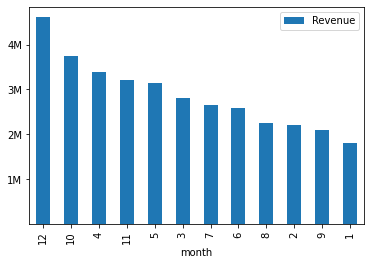

In [21]:
ytick_val = [1000000,2000000,3000000,4000000]
ytick_lab = ["1M", "2M", "3M", "4M"]
Total_sales_per_month.plot(kind = "bar")
plt.yticks(ytick_val, ytick_lab)
plt.show()

<h2>Q3: What City had the highest number of sales?</h2>

In [24]:
city_sales = sales_data.groupby('City').agg({"Quantity Ordered": "sum"})
city_sales.sort_values("Quantity Ordered", ascending = False)


,Quantity Ordered
City,
San Francisco,50226
Los Angeles,33288
New York City,27916
Boston,22524
Dallas,16728
Atlanta,16602
Seattle,16552
Portland,14051
Austin,11151


<AxesSubplot:xlabel='City'>

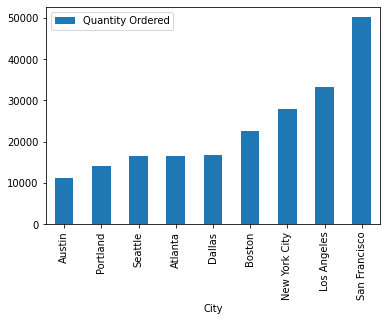

In [25]:
city_sales.sort_values("Quantity Ordered").plot(kind = "bar")

<h4 style = 'font_size = 25px'>San Francisco had the highest number of sales with a total of 50,226 quantity of products ordered.</h4>

<h2>Q4: What time should we display adverstisement to maximize likelihood of customer's buying product?<h2>

In [26]:
hourly_number_of_sales = sales_data.groupby('hour').agg({"Quantity Ordered": "sum"})
hourly_number_of_sales.sort_values("Quantity Ordered", ascending = False)

,Quantity Ordered
hour,
19,14470
12,14202
11,14005
18,13802
20,13768
13,13685
14,12362
10,12308
21,12244


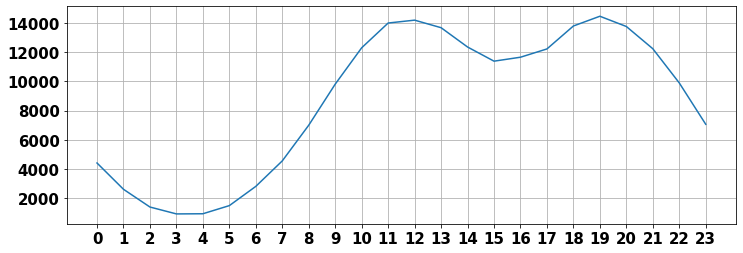

In [37]:
hours = [hour for hour in sales_data['hour'].unique()]
plt.figure(figsize=(12,4))
plt.plot(hourly_number_of_sales)
plt.grid(True)
plt.xticks(ticks = hours, weight = "bold", fontsize=15)
plt.yticks(weight = "bold", fontsize=15)
plt.show()

There are two peaks in the data set at 12PM and 7PM (19), so I recommend adertising before 12pm and 7pm, which could be 9:11Am and 4:6Pm 

In [39]:
monthly_num_of_sales = sales_data.groupby("month").agg({'Quantity Ordered':"sum"})
monthly_num_of_sales

,Quantity Ordered
month,
1,10862
2,13449
3,17005
4,20558
5,18667
6,15253
7,16072
8,13448
9,13109


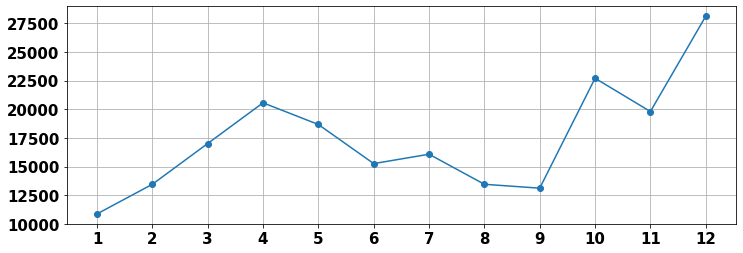

In [41]:
months = [month for month in sales_data['month'].unique()]
plt.figure(figsize=(12,4))
plt.plot(monthly_num_of_sales,marker = 'o')
plt.grid(True)
plt.xticks(ticks = months, weight = "bold", fontsize=15)
plt.yticks(weight = "bold", fontsize=15)
plt.show()

From the plot we can see that the highest sales occurred in December, and that could be due to that December is a celebrating season.
We can advertise in July, August and September to maximize the likelihood of a customer buying a Product.

# Q5: What products are most often sold together?

In [69]:
from itertools import combinations
from collections import Counter

# Dropping duplicate values of 'Order ID' using duplicated() function
data = sales_data[sales_data['Order ID'].duplicated(keep=False)]
# Joining product ordered with the same 'Order ID' in the new column called 'Bundle'
data['Bundle'] = sales_data.groupby('Order ID')['Product'].transform(lambda x: ",".join(x))

pd.set_option('mode.chained_assignment', None)
# This will stop showing the warning 

data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Revenue,City,hour,month,year,Bundle
46,236716,AA Batteries (4-pack),2,3.84,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",7.68,San Francisco,20,8,2019,"AA Batteries (4-pack),USB-C Charging Cable"
47,236716,USB-C Charging Cable,1,11.95,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",11.95,San Francisco,20,8,2019,"AA Batteries (4-pack),USB-C Charging Cable"
60,236729,iPhone,1,700.00,2019-08-09 09:28:00,"635 Lake St, San Francisco, CA 94016",700.00,San Francisco,9,8,2019,"iPhone,Apple Airpods Headphones"
61,236729,Apple Airpods Headphones,1,150.00,2019-08-09 09:28:00,"635 Lake St, San Francisco, CA 94016",150.00,San Francisco,9,8,2019,"iPhone,Apple Airpods Headphones"
62,236730,Google Phone,1,600.00,2019-08-02 10:17:00,"445 Lincoln St, New York City, NY 10001",600.00,New York City,10,8,2019,"Google Phone,Wired Headphones"


In [81]:
data = data[['Order ID', 'Bundle']].drop_duplicates()
# Creating a new variable for Counter
count = Counter()
# Creating a loop to count all the 2 product bundles.
for row in data['Bundle']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
# Creating another loop to display the 10 most often products that sold together.
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1004
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 359
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


We can see the most often products that sold together are iPhone and Lightning Charging Cable with **1004** transactions. Google Phone and USB-C Charging Cable came second with **987** transactions.
With this information we could offer a smart deal bundle to the customer that buys iPhone, we could recommend the Lightning Charging Cable with a discount. We also can bundle the remaining products with good marketing strategies.

# Q6: What product sold the most? Why do you think it sold the most?

In [83]:
sales_per_product = sales_data.groupby('Product').agg({'Quantity Ordered': 'sum'})
sales_per_product.sort_values("Quantity Ordered", ascending = False)

,Quantity Ordered
Product,
AAA Batteries (4-pack),31012
AA Batteries (4-pack),27635
USB-C Charging Cable,23971
Lightning Charging Cable,23211
Wired Headphones,20553
Apple Airpods Headphones,15657
Bose SoundSport Headphones,13454
27in FHD Monitor,7547
iPhone,6847


AAA Batteries (4-pack) sold more with total quantity sold of 31,013. These can be used to power any device that accepts AAA batteries. I think it sold more because it can be used to charge devices on the go.

# Q7:How much probability for next people will ordered USB-C Charging Cable?

In [104]:
#getting USB_C_Charging_Cable sales
USB_C_Charging_Cable = sales_per_product[sales_per_product.index == 'USB-C Charging Cable']
USB_C_Charging_Cable

,Quantity Ordered
Product,
USB-C Charging Cable,23971


In [111]:
#Calculating the probability by dividing sales of usb_c over year sales
prob = (USB_C_Charging_Cable["Quantity Ordered"]/209308)*100 
prob

Product
USB-C Charging Cable    11.452501
Name: Quantity Ordered, dtype: float64

The probability that next people will ordered USB-C Charging Cable is 11.5%

# Q8: How much probability for next people will ordered iPhone?


In [112]:
#Getting Iphone sales
Iphone_sales = sales_per_product[sales_per_product.index == 'iPhone']
Iphone_sales

,Quantity Ordered
Product,
iPhone,6847


In [113]:
#Calculating the probability by dividing sales of iphone over year sales
prob = (Iphone_sales["Quantity Ordered"]/209308)*100 
prob

Product
iPhone    3.271256
Name: Quantity Ordered, dtype: float64

The probability that next people will ordered iphone is 3%